## Unconstrained Optimization on Rosenbrock function

We attempt a solution at the following function $$f(x) = \frac{1}{2} x^T Qx - c^T x + 10 $$

where $$Q = \begin{bmatrix} 20 & 5 \\ 5 & 2 \end{bmatrix}$$ and $$c = \begin{bmatrix} 14 \\ 6 \end{bmatrix}$$


Implement a simple gradient descent solver in Python, using a line search with bisection to compute the step size that produces the maximum function decrease at each step. Test your solver on the example problem in Section 4.2 of Freund and plot the convergence along with level sets of the objective function

In [ ]:
from numpy.linalg import norm
from numpy.linalg import inv
from sympy.utilities.lambdify import lambdify

cur_x = [3, 1]

func = lambdify((b,theta), area)
dfunc = lambdify((b,theta), (derive_by_array(area, (b,theta))) )
hess = lambdify((b,theta), derive_by_array(derive_by_array(area, (b,theta)), (b,theta)))

step = 0.01 # step size multiplier
precision = 0.00001
previous_step_size = 1 
max_iters = 10000 # maximum number of iterations
iters = 0 #iteration counter

while previous_step_size > precision and iters < max_iters:
    prev_x = cur_x
    cur_x -= step * np.array(dfunc(*prev_x))
    previous_step_size = norm(cur_x - prev_x)
    iters += 1
    
print("The local minimum occurs at", cur_x)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from scipy import optimize

Q = np.array([[20, 5],[5, 2]])
c = np.array([[14],[6]])

def func(x):
    return 1/2 * x.T @ Q*x - c.T * x + 10

print(optimize.bisect(func, 40, -100))
# def dfunc(x):
#     return Q*x - c.T

# start = np.array([1,2])

# def gradientdescent(start, step = 0.01, precision = 0.00001, max_iters = 10000):
#     previous_step_size = 1
#     iters = 0
#     cur_x = start
    
#     while previous_step_size > precision and iters < max_iters:
#         prev_x = cur_x
#         cur_x -= step * np.array(dfunc(*prev_x))
#         previous_step_size = norm(cur_x - prev_x)
#         iters += 1
#     return cur_x
    



AttributeError: 'float' object has no attribute 'T'

In [30]:
x1 = np.arange(-10,10)
x2 = np.arange(-10,10)
x = np.array([x1,x2]).reshape((2,-1))

Q = np.array([[20,5],
              [5,2]])
c= np.array([[14],
             [6]])


z = lambda x : 0.5*x.T @ Q @ x - c.T @ x + 10

def f(x):
    # Function definition here
    return 0.5*x.T @ Q @ x - c.T @ x + 10

def gradf(x):
    # Gradient definition here
    return np.gradient(x)

X0 = [40,-100] # Starting state

In [37]:
import numpy as np
from scipy.optimize import minimize

Q = np.array([[20, 5],[5, 2]])
c = np.array([[14],[6]])

def f(x):
    return np.dot(0.5*np.transpose(x),np.dot(Q,x)) - np.dot(np.transpose(c),x) + 10

x0 = np.array([1,1])

res = minimize(f, x0, method='BFGS', options={'xtol': 1e-8, 'disp': True})

print(res)

Optimization terminated successfully.
         Current function value: 0.933333
         Iterations: 6
         Function evaluations: 28
         Gradient evaluations: 7
      fun: 0.9333333333333318
 hess_inv: array([[ 0.1333328 , -0.33332053],
       [-0.33332053,  1.33305049]])
      jac: array([2.38418579e-07, 1.19209290e-07])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-0.13333333,  3.33333332])


/Users/jacob/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: OptimizeWarning: Unknown solver options: xtol
  if sys.path[0] == '':


In [47]:
import numpy as np
from scipy.optimize import approx_fprime

def grad_solver(func, x0, maxiter=10000):
    eps = np.sqrt(np.finfo(float).eps)  
    
    k = 0  # iterations
    x = np.array(x0, dtype=float)
    xs, fs, alphs = [x], [func(x)], [0]
    
    grad = np.ones_like(x)
    while (abs(sum(grad)) > 1e-6) and k <= maxiter:
        grad = -approx_fprime(x, func, eps)
        h = lambda a: func(x + a*grad)
        
        a_upper = np.array([0.001])
        step_size_slope = approx_fprime(a_upper, h, eps)
        
        while step_size_slope <= 0:
            a_upper *= 2
            step_size_slope = approx_fprime(a_upper, h, eps)
            
        k_ba = 0  # Iterations on the bisec. algorithm
        a_lower = 0  # Lower bound
        step_size_slope = 1  # Slope (we wish to find a such that the slope is zero)
                
        while abs(step_size_slope) > 1e-6:
            step_size = (a_upper + a_lower) / 2
            step_size_slope = approx_fprime(step_size, h, eps)

            if step_size_slope > 0: a_upper = step_size
            else: a_lower = step_size
            k_ba += 1
            
        # STEP 3 - Update x
        x += step_size*grad
        xs.append(x); fs.append(func(x)); alphs.append(step_size)
        k += 1
        
    
    print("Solution found at {}! f(x) = {:.2f}".format(x, func(x)))
    return(xs, fs, alphs)

    

x, a, y = grad_solver(lambda x: 0.5*np.matmul(np.matmul(np.array(x).T, np.array([[20, 5], [5, 2]])), np.array(x)) -\
                        np.matmul(np.array([14, 6]).T, x) + 10, (1, 1))
    

Solution found at [-0.13333336  3.33333323]! f(x) = 0.93


## The Rosenbrock Function

The Rosenbrock function is of the form $$ 10(y − x^2)^2 + (x − 1)^2 $$

We attempt to minimize this with the initial guess $$ (-0.8,1 ) $$

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x, y = np.meshgrid(x, y)

z =  10*(y - x**2)**2 + (x - 1)**2

fig = plt.figure(figsize = (10,5))
ax = fig.gca(projection='3d')

surf = ax.plot_surface(x, y, z, rstride = 1, cstride = 1, 
                       cmap = cm.coolwarm, linewidth = 0, antialiased = False)

plt.title('Rosenbrock Function')
plt.show()

<Figure size 1000x500 with 1 Axes>

## Gradient Descent

Using normal gradient descent, it does not seem to converge.


1 [-0.800792  0.99928 ] 4.524578985535514
2 [-0.80157861  0.99856398] 4.513299702197743
3 [-0.80235986  0.9978519 ] 4.502160663617762
4 [-0.80313576  0.99714376] 4.491160392356843
5 [-0.80390632  0.99643953] 4.480297419988636
6 [-0.80467157  0.99573918] 4.4695702871781
7 [-0.80543152  0.9950427 ] 4.458977543757189
8 [-0.80618619  0.99435005] 4.448517748797335
9 [-0.8069356   0.99366122] 4.438189470678761
10 [-0.80767977  0.99297619] 4.427991287156647
11 [-0.80841871  0.99229493] 4.417921785424186


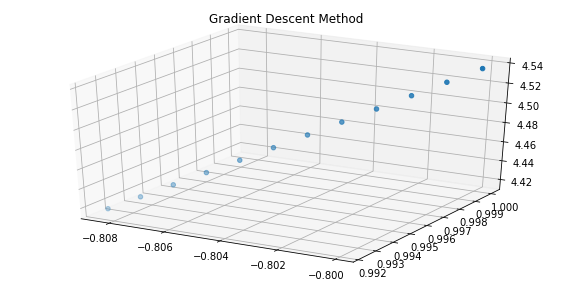

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sympy.tensor.array import derive_by_array

def func(x):
    return 10*(x[1] - x[0]**2)**2 + (x[0] - 1)**2

def dfunc(x):
    return np.array([-40*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2,
                     -20*x[0]**2 + 20*x[1]])

def grad(x, max_int):
    miter = 1
    step = .0001/miter
    vals = []
    objectfs = []
    
    # you can customize your own condition of convergence, here we limit the number of iterations
    while miter <= max_int:
        vals.append(x)
        objectfs.append(func(x))
        temp = x-step*dfunc(x)
        if np.abs(func(temp)-func(x))>0.01:
            x = temp
        else:
            break
        print(miter, x, func(x))
        miter += 1
    return vals, objectfs, miter

start = [-0.8, 1]

val, objectf, iters = grad(start, 50)

x = np.array([i[0] for i in val])
y = np.array([i[1] for i in val])
z = np.array(objectf)
fig = plt.figure(figsize = (10,5))
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='gradient descent method')
plt.title("Gradient Descent Method")
plt.show()

## Using Newton's Method

[-1.09032258  1.10451613] 4.440491813396774 1
[-0.3120196 -0.5083993] 5.3907930919227365 2
[-0.21198082  0.03492811] 1.4698990671492376 3
[ 0.79787265 -0.38320327] 10.440858185048473 4
[0.80731958 0.65167566] 0.037125822734415025 5
[0.9996567  0.96231995] 0.013685357304760035 6
[0.99985401 0.99970801] 2.1312188707699346e-08 7
[-1.09032258  1.10451613] 4.440491813396774 1
[-0.3120196 -0.5083993] 5.3907930919227365 2
[-0.21198082  0.03492811] 1.4698990671492376 3
[ 0.79787265 -0.38320327] 10.440858185048473 4
[0.80731958 0.65167566] 0.037125822734415025 5
[0.9996567  0.96231995] 0.013685357304760035 6
[0.99985401 0.99970801] 2.1312188707699346e-08 7


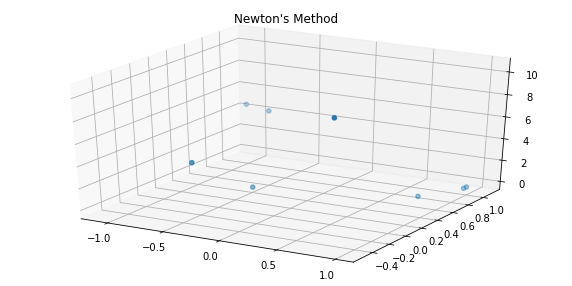

In [6]:
from numpy.linalg import inv

def func(x):
    return 10*(x[1] - x[0]**2)**2 + (x[0] - 1)**2

def dfunc(x):
    return np.array([-40*x[0]*(-x[0]**2 + x[1]) + 2*x[0] - 2,
                     -20*x[0]**2 + 20*x[1]])

def hess(x):
    return np.array([[120*x[0]**2 - 40*x[1] + 2, -40*x[0]],
                     [-40*x[0], 20]])

def newton(x, max_int):
    miter = 1
    step = 1
    vals = []
    objectfs = []
    
    
    
    while miter <= max_int:

        vals.append(x)
        objectfs.append(func(x))
        temp = x - step*(inv(hess(x)) @ dfunc(x))
        
        if np.abs(func(temp) - func(x)) > 0.01:
            x = temp
        else:
            
            break
        print(x, func(x), miter)
        miter += 1
        
    return vals, objectfs, miter
                
start = [-0.8, 1]

newton(start, 50)

val, objectf, iters = newton(start, 50)

x = np.array([i[0] for i in val])
y = np.array([i[1] for i in val])
z = np.array(objectf)

fig = plt.figure(figsize = (10,5))
ax = fig.gca(projection='3d')
ax.scatter(x, y, z, label='gradient descent method')
plt.title("Newton's Method")
plt.show()

In [91]:
hessian

array([120*x**2 - 40*y + 2, -40*x, -40*x, 20], dtype=object)

In [ ]:

import sympy as sp
from sympy.tensor.array import derive_by_array


x, y = sp.symbols('x, y', real = True)

f = 10*(y - x**2)**2 + (x - 1)**2

grad = np.array(derive_by_array(f, (x,y)))
hessian = np.array(derive_by_array(derive_by_array(f, (x,y)), (x,y)))

grad

In [50]:

def gradient_descent(x, max_int):
    miter = 1
    step = .0001/miter
    vals = []
    objectfs = []
    
    while miter <= max_int:
        vals.append(x)
        objectfs.append()



hessian.shape, type(hessian)

((4,), numpy.ndarray)

In [ ]:
init = np.array([[12],
                 [5]])

f(init)

In [27]:
import numpy as np
from scipy.optimize import minimize

Q = np.array([[20, 5],[5, 2]])
c = np.array([[14],[6]])

def f(x):
    return np.dot(0.5*np.transpose(x),np.dot(Q,x)) - np.dot(np.transpose(c),x) + 10

x0 = np.array([1,1])

res = minimize(f, x0, method='BFGS', options={'xtol': 1e-8, 'disp': True})

print(res)

Optimization terminated successfully.
         Current function value: 0.933333
         Iterations: 6
         Function evaluations: 28
         Gradient evaluations: 7
      fun: 0.9333333333333353
 hess_inv: array([[ 0.13333187, -0.33331821],
       [-0.33331821,  1.33304488]])
      jac: array([3.57627869e-07, 0.00000000e+00])
  message: 'Optimization terminated successfully.'
     nfev: 28
      nit: 6
     njev: 7
   status: 0
  success: True
        x: array([-0.13333333,  3.33333336])


/Users/jacob/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: OptimizeWarning: Unknown solver options: xtol
  if sys.path[0] == '':
